In [19]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
stocks = ['../Data/stocks/DKNG.csv','../Data/stocks/FB.csv','../Data/stocks/MSFT.csv']
data = pd.read_csv(stocks[0])

In [21]:
X = data['Close'].values

293


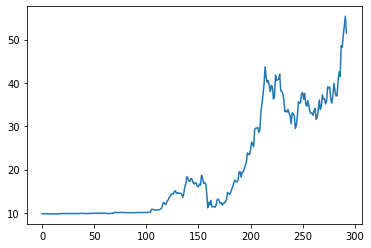

In [22]:
# Define Sine Wave
plt.plot(X)
print(len(X))

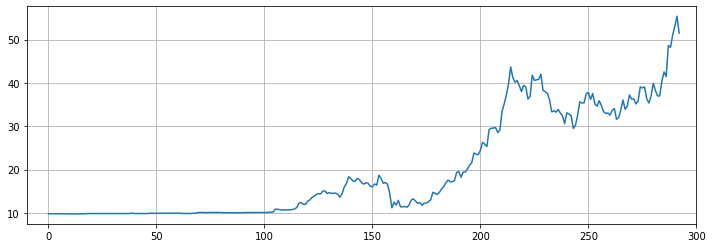

In [23]:
# Define Sine Wave
plt.figure(figsize=(12,4))
plt.xlim(-10,300)
plt.grid(True)
plt.plot(X)

In [24]:
# take the first 760 for the training test
# take the rest 40 for the test set
test_size = 20
train_set = torch.tensor(X[:-test_size], dtype=torch.float)
test_set = torch.tensor(X[-test_size:], dtype=torch.float)

273


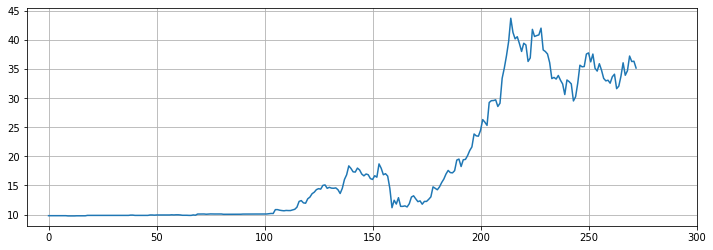

In [25]:
# Define Sine Wave
plt.figure(figsize=(12,4))
plt.xlim(-10,300)
plt.grid(True)
plt.plot(train_set)
print(train_set.shape[0])

In [26]:
torch.arange(test_set.shape[0])+len(train_set)

tensor([273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292])

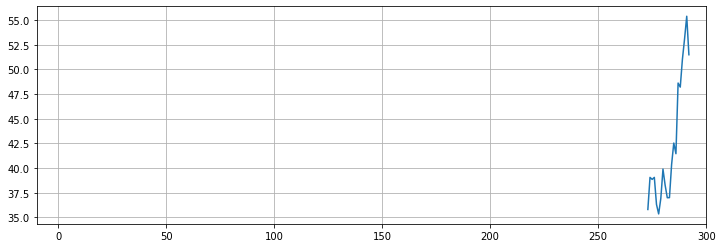

In [27]:
plt.figure(figsize=(12,4))
plt.xlim(-10,300)
plt.grid(True)
plt.plot(torch.arange(test_set.shape[0])+len(train_set), test_set)

In [28]:
def input_data(seq, ws):
    '''
        seq - sequence
        ws - window size
    '''
    out = [] # list of tuples that points to the next item.
             # ([1,2,3,4],[5]) , ([2,3,4,5],[6])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
        
    return out

In [29]:
window_size = 20
train_data = input_data(train_set,window_size)

In [30]:
len(train_data)

253

In [31]:
train_data[0]

(tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000,
         9.7600, 9.7600, 9.7600, 9.7600, 9.7800, 9.7800, 9.7800, 9.7800, 9.7800,
         9.8500, 9.8500]), tensor([9.8500]))

In [32]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        '''
        input_size = input time series
        hidden_size = how many neurons you want inside the LSTM hidden layer
        out_size = number of predictions
        '''
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1))
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        # [1,2,3] [4] ---> We just want 4 from that value
        return pred[-1]

In [33]:
torch.manual_seed(42)
model = LSTM(hidden_size=200)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [34]:
model

LSTM(
  (lstm): LSTM(1, 200)
  (linear): Linear(in_features=200, out_features=1, bias=True)
)

Epoch [1/20]. Loss : 3.08193039894104
Performance on test range : 110.39762115478516


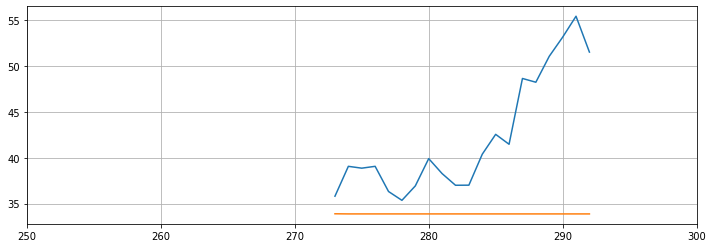

Epoch [2/20]. Loss : 2.6249032020568848
Performance on test range : 103.17543029785156


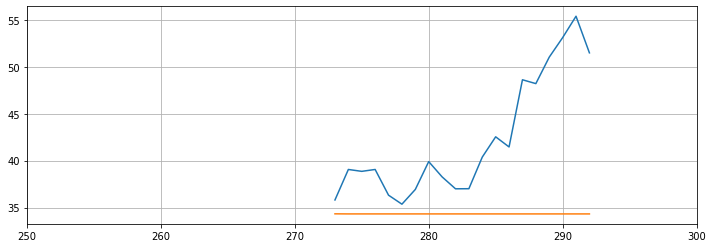

Epoch [3/20]. Loss : 1.5241148471832275
Performance on test range : 94.30744934082031


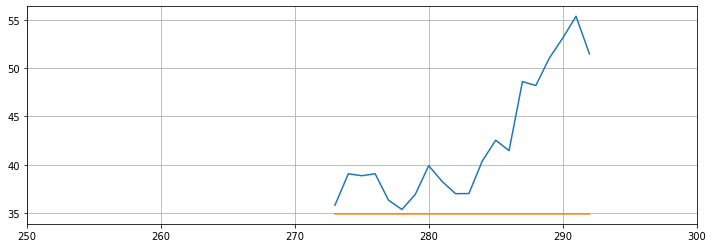

Epoch [4/20]. Loss : 1.3775142431259155
Performance on test range : 91.41007232666016


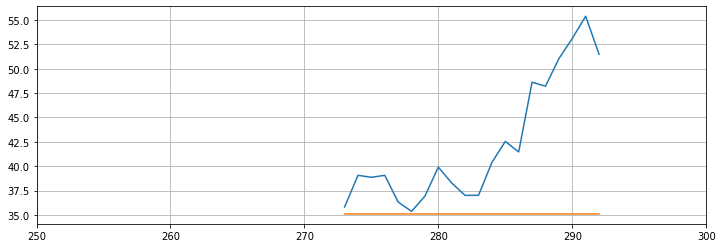

Epoch [5/20]. Loss : 1.3763593435287476
Performance on test range : 88.59992980957031


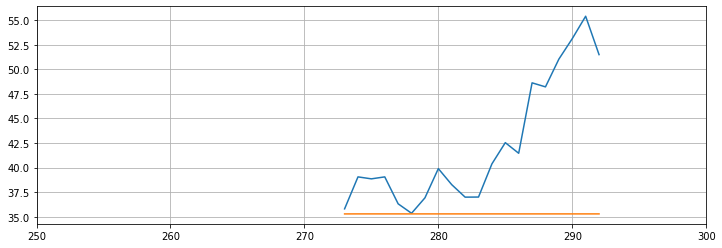

Epoch [6/20]. Loss : 1.3783650398254395
Performance on test range : 87.03771209716797


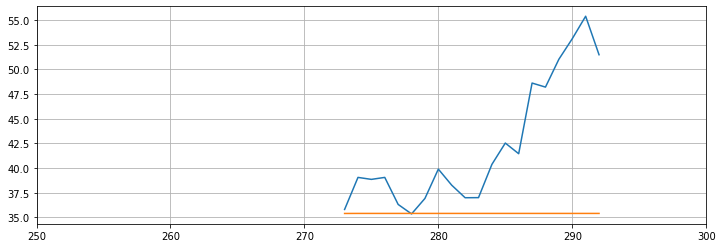

Epoch [7/20]. Loss : 1.380103349685669
Performance on test range : 87.77455139160156


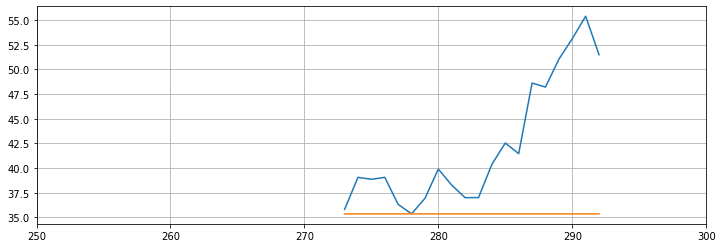

Epoch [8/20]. Loss : 1.3507730960845947
Performance on test range : 85.71503448486328


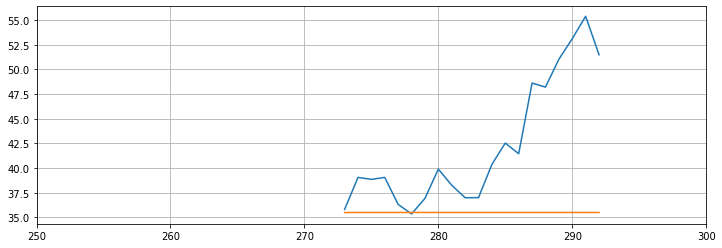

Epoch [9/20]. Loss : 1.2708402872085571
Performance on test range : 84.6510238647461


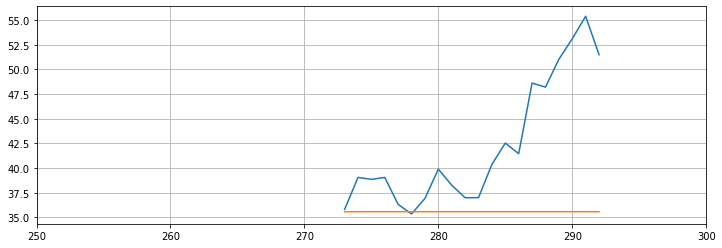

Epoch [10/20]. Loss : 1.1729059219360352
Performance on test range : 84.0039291381836


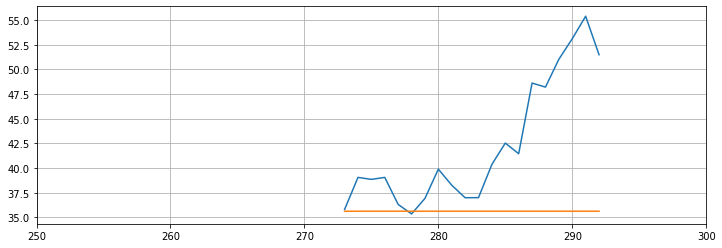

Epoch [11/20]. Loss : 1.0155783891677856
Performance on test range : 83.55923461914062


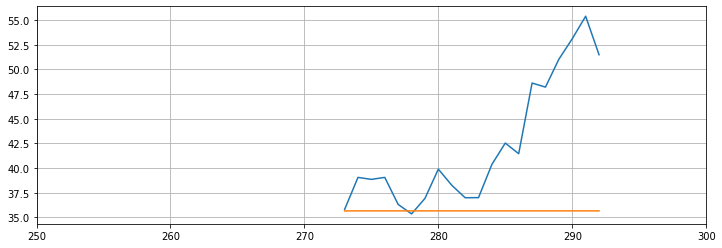

Epoch [12/20]. Loss : 0.7333221435546875
Performance on test range : 83.71278381347656


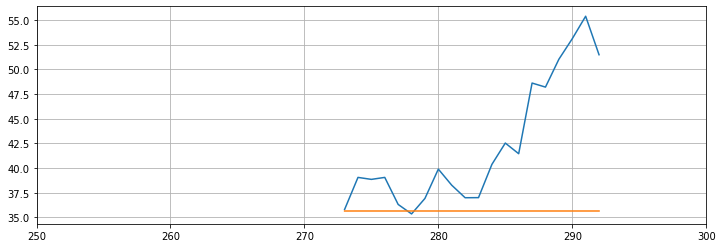

Epoch [13/20]. Loss : 0.3436804711818695
Performance on test range : 85.12883758544922


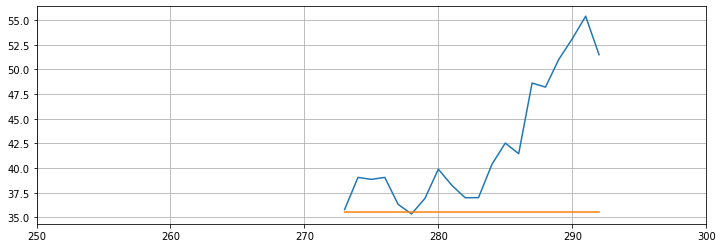

Epoch [14/20]. Loss : 0.6660085320472717
Performance on test range : 83.76978302001953


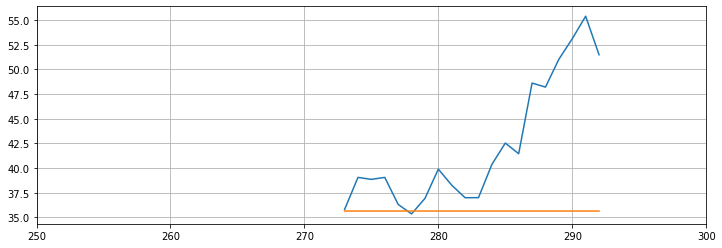

Epoch [15/20]. Loss : 0.00012390554184094071
Performance on test range : 90.5621566772461


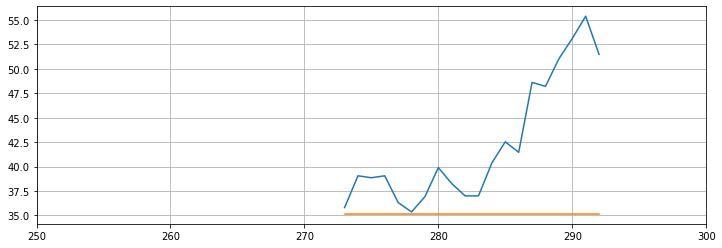

Epoch [16/20]. Loss : 0.1975293606519699
Performance on test range : 96.46285247802734


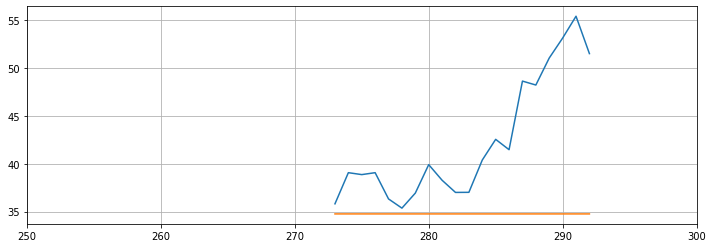

Epoch [17/20]. Loss : 0.28695592284202576
Performance on test range : 98.05738830566406


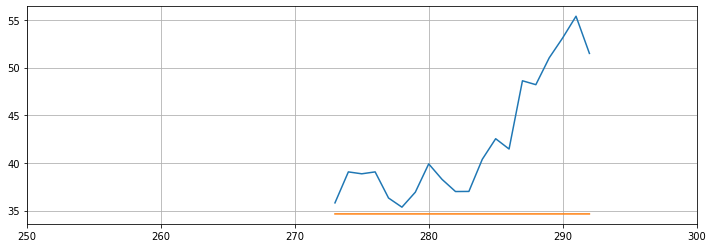

Epoch [18/20]. Loss : 3.0944931507110596
Performance on test range : 117.9421157836914


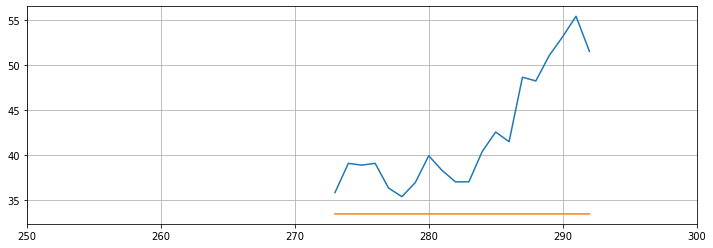

Epoch [19/20]. Loss : 0.08003556728363037
Performance on test range : 94.30921936035156


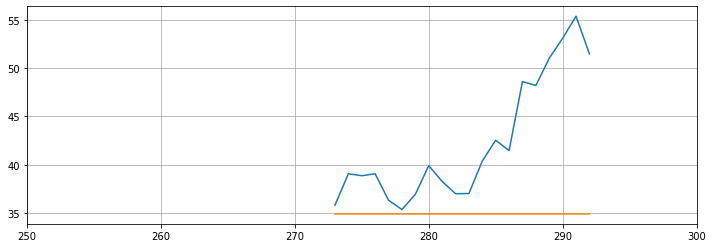

Epoch [20/20]. Loss : 0.019644714891910553
Performance on test range : 89.20697784423828


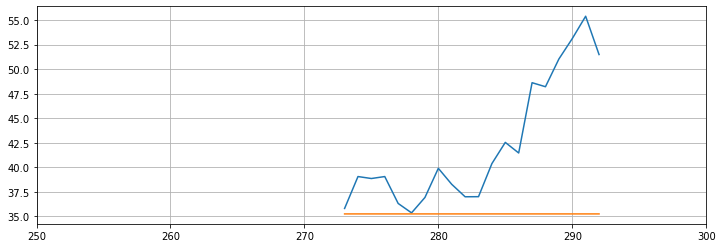

In [35]:
epochs = 20
future = 20

for epoch in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch + 1}/{epochs}]. Loss : {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden =  (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), test_set[-20:])
    print(f'Performance on test range : {loss.item()}')
    
    plt.figure(figsize=(12,4))
    plt.xlim(250,300)
    plt.grid(True)
    plt.plot(torch.arange(test_set.shape[0])+len(train_set), test_set.numpy())
    plt.plot(torch.arange(test_set.shape[0])+len(train_set),  preds[-window_size:])
    plt.show()

In [37]:
train_data

[(tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000,
          9.7600, 9.7600, 9.7600, 9.7600, 9.7800, 9.7800, 9.7800, 9.7800, 9.7800,
          9.8500, 9.8500]), tensor([9.8500])),
 (tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.7600,
          9.7600, 9.7600, 9.7600, 9.7800, 9.7800, 9.7800, 9.7800, 9.7800, 9.8500,
          9.8500, 9.8500]),
  tensor([9.8500])),
 (tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.7600, 9.7600,
          9.7600, 9.7600, 9.7800, 9.7800, 9.7800, 9.7800, 9.7800, 9.8500, 9.8500,
          9.8500, 9.8500]), tensor([9.8500])),
 (tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.7600, 9.7600, 9.7600,
          9.7600, 9.7800, 9.7800, 9.7800, 9.7800, 9.7800, 9.8500, 9.8500, 9.8500,
          9.8500, 9.8500]), tensor([9.8500])),
 (tensor([9.8000, 9.8000, 9.8000, 9.8000, 9.8000, 9.7600, 9.7600, 9.7600, 9.7600,
          9.7800, 9.7800, 9.7800, 9.7800, 9.7800, 9.8500, 9.8500, 9.8500